기한: 12월 22일 (금) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch7. 5 pg. 441~451 

필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# 07. 군집화

## 07-05. DBSCAN

### DBSCAN 개요
DBSCAN(Density Based Spatial Clustering of Applications with Noise) 

데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.

----------------------
DBSCAN을 구성하는 가장 중요한 두 가지 파라미터
- 입실론 주변 영역 (epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수 (min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

--------------------------------
입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.
- 핵심 포인트 (core point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다
- 이웃 포인트 (neighbor point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 한다.
- 경계 포인트 (border point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 한다.
- 잡음 포인트 (noise point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 한다.

----------------------------
DBSCAN 클래스의 주요 파라미터
- eps : 입실론 주변 영역의 반경
- min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수(자신의 데이터 포함)

### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


0과 1 두 개의 군집으로 군집화 되었다.
-1로 레이블된 것은 노이즈에 속하는 군집이다

------------------
DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, visualize_cluster_plot() 함수로 시각화한다.

In [9]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_

    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)

    if isNoise:
        legend_loc='upper center'
    else:
        legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

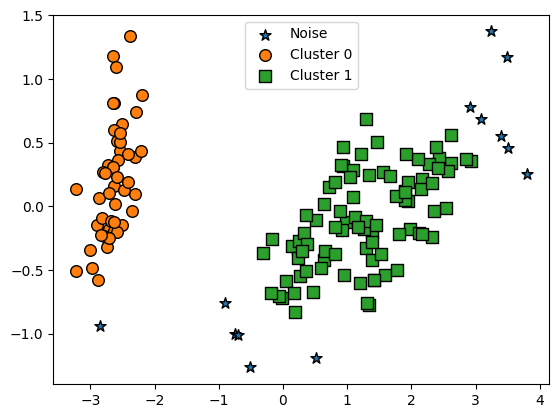

In [10]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components = 2러 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_clsuter_2d() 함수는 ftr1, ftr2칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


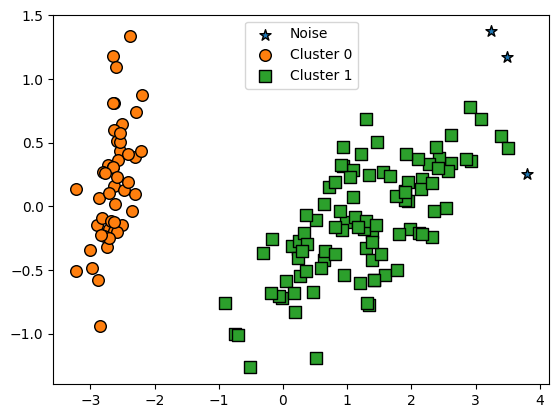

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

노이즈 군집인 -1이 3개밖에 없다. 기존에 eps가 0.6일때 노이즈로 분류된 데이터 세트가 eps 반경이 커지면서 cluster1에 소속되었다. 이번에는 eps를 유지하고 min_samples를 늘려보자

In [15]:
dbsacn = DBSCAN(eps = 0.6, min_samples=16, metric='euclidean')

### DBSCAN 적용하기 - make_circles() 데이터 세트
DBSCAN과 타 알고리즘 비교하기

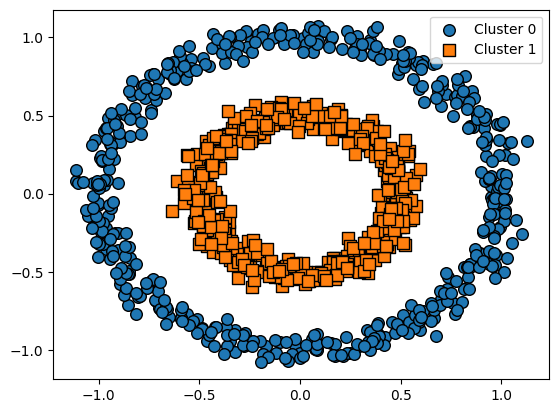

In [17]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle = True, noise = 0.05, random_state=0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

----------------
KMEANS로 make_circles() 데이터 세트 군집화

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14156\1486832469.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


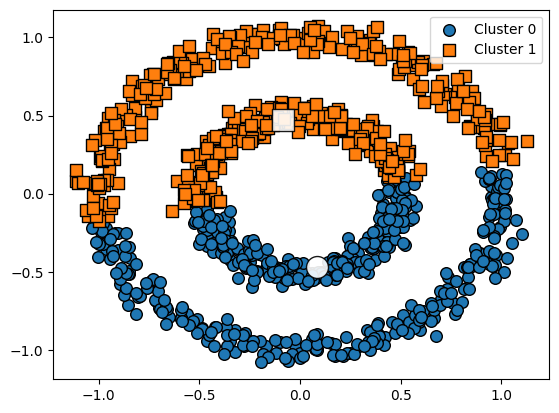

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

---------------
GMM

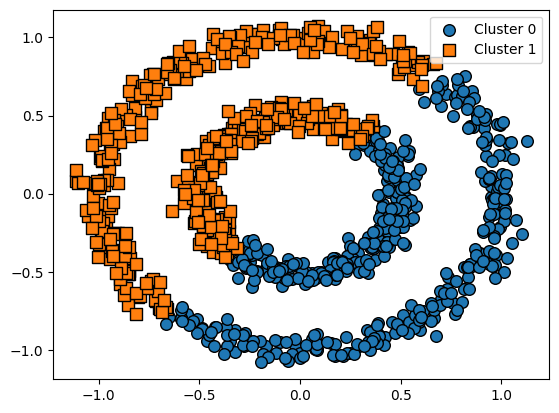

In [19]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

------------
DBSCAN

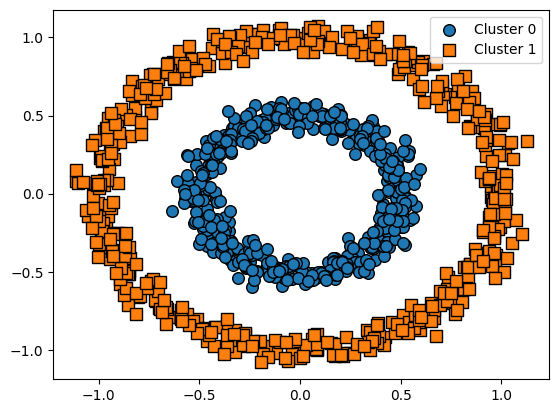

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)